In [5]:
from collections import namedtuple

def f():
    mb = namedtuple('Minibatch', ['img_attrs', 'person_attrs', 'obj_attrs'])
    return mb(img_attrs=[5, 4], person_attrs=['1212', '23', '1234'], obj_attrs=None)

a = f()
b, c, d = a
print(b, c, d)
print(a.img_attrs, a.person_attrs, a.obj_attrs)

# import numpy as np
# from matplotlib import pyplot as plt
# 
# n = 50
# x = np.arange(n + 1)
# y = 1 - 1/np.maximum(1, x)
# 
# plt.plot(x, y)
# plt.grid()
# plt.show()

[5, 4] ['1212', '23', '1234'] None
[5, 4] ['1212', '23', '1234'] None


In [1]:
import json

with open('data/HICO/HAKE/Part_State_76.txt', 'r') as f:
    lines = f.readlines()
part_labels = [l.strip() for l in lines]
part_action_pairs = []
part_action_dict = {}
for l in lines:
    pa_pair = [x.strip() for x in l.split(':')]
    part, action = pa_pair
    part_action_pairs.append(pa_pair)
    part_action_dict.setdefault(part, []).append(action)
actions = sorted({v for vs in part_action_dict.values() for v in vs})
parts = sorted(part_action_dict.keys())

hico_parts_train = json.load(open('data/HICO/HAKE/train.json', 'r'))


In [1]:
import numpy as np
import pickle

embs = pickle.load(open('cache/glove_300_act_norm-avg.pkl', 'rb'))
sim = embs @ embs.T
out = np.array([7, 17, 21, 25, 38, 50])

x, y = np.where(sim - np.eye(sim.shape[0]) >= 0.6)

inds = sorted({i for i, n in enumerate(x) if n not in out} &
              {i for i, n in enumerate(y) if n not in out})
x = x[inds]
y = y[inds]
print(np.stack([x, y], axis=1))
        

[[ 55 108]
 [ 57  71]
 [ 66  67]
 [ 67  66]
 [ 71  57]
 [ 86  87]
 [ 86  93]
 [ 86  97]
 [ 87  86]
 [ 87  93]
 [ 87  94]
 [ 87 101]
 [ 87 103]
 [ 87 109]
 [ 93  86]
 [ 93  87]
 [ 93  94]
 [ 93 101]
 [ 93 103]
 [ 93 109]
 [ 94  87]
 [ 94  93]
 [ 97  86]
 [101  87]
 [101  93]
 [101 103]
 [101 109]
 [103  87]
 [103  93]
 [103 101]
 [103 109]
 [108  55]
 [109  87]
 [109  93]
 [109 101]
 [109 103]]


In [17]:
import numpy as np
import torch
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad)

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] = 2342
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] -= 9
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.]], grad_fn=<PowBackward0>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[   0.,    1.],
        [   4., 2342.],
        [  16.,   25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  0.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  0.],
        [16., 25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])


In [10]:
import numpy as np
import torch
n = 5
x0 = torch.tensor(torch.from_numpy(np.arange(n*2).reshape(n, 2)).float(),requires_grad=True)
a_inds = torch.from_numpy(np.array([0, 3, 4]))
b_inds = torch.from_numpy(np.array([i for i in range(n) if i not in a_inds]))
a = x0[a_inds, :].detach()
b = x0[b_inds, :]
x = torch.cat([a, b], dim=0)[torch.sort(torch.cat([a_inds, b_inds]))[1]]
print((x0 == x).all())
y = x**2
z = y.sum()
z.backward()
print(a.requires_grad, b.requires_grad, x.requires_grad)
print(x0) 
print(x) 
print(y) 
print(y.grad)
print(x.grad)
print(a.grad)
print(b.grad)
print(x0.grad)

tensor(1, dtype=torch.uint8)
False True True
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]], requires_grad=True)
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]], grad_fn=<TakeBackward>)
tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.],
        [36., 49.],
        [64., 81.]], grad_fn=<PowBackward0>)
None
None
None
None
tensor([[ 0.,  0.],
        [ 4.,  6.],
        [ 8., 10.],
        [ 0.,  0.],
        [ 0.,  0.]])


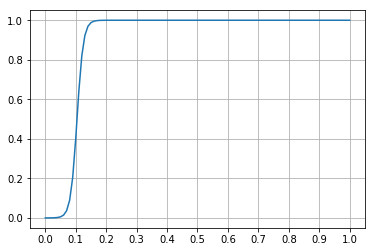

In [21]:
import numpy as np
from matplotlib import pyplot as plt

n = 100
x = np.arange(n + 1) / n

w, k = 96, 10
T = 1 + np.exp(k - w).item()
y = T / (1 + np.exp(-(w * x - k)))

plt.plot(x, y)
plt.gca().set_xticks(np.arange(11) / 10)
plt.grid()
plt.show()


In [1]:
with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
               for l in f.readlines()]
print(inet_categories[0])
print(inet_categories[1])
print(inet_categories[-2])
print(inet_categories[-1])

from lib.detection.wrappers import COCO_CLASSES
print(COCO_CLASSES)

common = set(COCO_CLASSES.values()) & {c for cat in inet_categories for c in cat}
print(len(common))   


['tench', 'Tinca tinca']
['goldfish', 'Carassius auratus']
['ear', 'spike', 'capitulum']
['toilet tissue', 'toilet paper', 'bathroom tissue']
{0: '__background__', 1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 12: 'stop sign', 13: 'parking meter', 14: 'bench', 15: 'bird', 16: 'cat', 17: 'dog', 18: 'horse', 19: 'sheep', 20: 'cow', 21: 'elephant', 22: 'bear', 23: 'zebra', 24: 'giraffe', 25: 'backpack', 26: 'umbrella', 27: 'handbag', 28: 'tie', 29: 'suitcase', 30: 'frisbee', 31: 'skis', 32: 'snowboard', 33: 'sports ball', 34: 'kite', 35: 'baseball bat', 36: 'baseball glove', 37: 'skateboard', 38: 'surfboard', 39: 'tennis racket', 40: 'bottle', 41: 'wine glass', 42: 'cup', 43: 'fork', 44: 'knife', 45: 'spoon', 46: 'bowl', 47: 'banana', 48: 'apple', 49: 'sandwich', 50: 'orange', 51: 'broccoli', 52: 'carrot', 53: 'hot dog', 54: 'pizza', 55: 'donut', 56: 'cake', 57: 'chair', 58: 'couch

In [ ]:
import pickle
import numpy as np
to_filter = [19, 25, 117, 144, 151, 152, 154, 163, 167, 
             190, 245, 258, 307, 326, 347, 366, 400, 
             433, 434, 466, 471, 476, 479, 523, 598]
keep = set(range(600)) - set(to_filter)
d = {'train': {'inter': np.array(sorted(keep))
               }
     }
with open('zero-shot_inds/seen_inds_2.pkl.push', 'wb') as f:
    pickle.dump(d, f)
    

In [14]:
import pickle
import numpy as np
from lib.dataset.hico_hake import HicoHake

hh = HicoHake()
pacts = {a for p, a in hh.part_actions_pairs}
acts = {a.replace('_', ' ') for a in hh.actions[1:]} | {hh.null_action}
common = sorted((acts & pacts) - {hh.null_action})
pacts_ex = sorted(pacts - acts)
acts_ex = sorted(acts - pacts)

words_in_pacts = {w for a in pacts for w in a.split()}
possible_unseen_acts_inds = np.array([i for i, a in enumerate(hh.actions) 
                                      if a != hh.null_action and a.split('_')[0] not in words_in_pacts])
possible_unseen_acts = [hh.actions[i] for i in possible_unseen_acts_inds]

for i, perc_seen in enumerate([80, 50, 33]):
    num_unseen = min(len(possible_unseen_acts_inds), 
                     (hh.num_actions * (100 - perc_seen)) // 100)
    unseen_acts = np.random.choice(possible_unseen_acts_inds, 
                                   size=num_unseen,
                                   replace=False)
    seen_acts = np.setdiff1d(np.arange(hh.num_actions), unseen_acts)
    print(f'Num seen: {seen_acts.size}')
    d = {'train': {'obj': np.arange(hh.num_objects), 
                   'act': seen_acts
                   }}
    with open(f'zero-shot_inds/seen_inds_{3 + i}.pkl.push', 'wb') as f:
        pickle.dump(d, f)

Num seen: 94
Num seen: 59
Num seen: 39


In [3]:
import pickle
import numpy as np
from lib.dataset.hico import Hico

hico = Hico()
d = {'train': {'obj': np.arange(hico.num_objects), 'act': np.arange(hico.num_actions)}}
with open('zero-shot_inds/seen_inds_6.pkl.push', 'wb') as f:
    pickle.dump(d, f)


In [18]:
import pickle
from lib.dataset.hico import Hico, Splits
import numpy as np

hico = Hico()
split = Splits.TRAIN

fnum = 4
d = pickle.load(open(f'zero-shot_inds/seen_inds_{fnum}.pkl.push', 'rb'))
ainds = d['train']['act']
oinds = d['train']['obj']

labels = hico.split_annotations[split]
act_labels = np.minimum(1, labels @ hico.interaction_to_action_mat)
print(f'{len(set(ainds.tolist()))} / {hico.num_actions} = '
      f'{len(set(ainds.tolist())) / hico.num_actions}')
print(f'{act_labels[:, ainds].sum() / act_labels.sum()}')
print(f'{len(set(oinds.tolist()))} / {hico.num_objects}')



59 / 117 = 0.5042735042735043
0.7447047770881968
80 / 80


In [5]:
import json
d = json.load(open('data/VideoCaptions/train.json', 'r'))
captions = [s for v in d.values() for s in v['sentences']]
print(captions[0])
 

A young woman is seen standing in a room and leads into her dancing.
[1.86528073 1.86528073]


In [9]:
with open('data/VG/Kato/VG_train_1A2B.csv', 'r') as f:
    tr_fns = {l.strip().split(',')[0] for l in f.readlines() if l.strip()}

with open('data/VG/Kato/VG_test.csv', 'r') as f:
    te_fns = {l.strip().split(',')[0] for l in f.readlines() if l.strip()}

print(len(tr_fns))
print(len(te_fns))
print(len(tr_fns | te_fns))

10799
4251
15050


In [5]:
import pickle
from lib.dataset.hico_hake import HicoHakeSplit
from lib.dataset.utils import Splits
from sklearn.metrics import average_precision_score
import numpy as np


with open('zero-shot_inds/seen_inds_1.pkl.push', 'rb') as f:
    d = pickle.load(f)
    
ainds = d['train']['act']
oinds = d['train']['obj']

s = HicoHakeSplit.get_splits(act_inds=ainds, obj_inds=oinds)
ds = s[Splits.TEST]

inds = np.setdiff1d(np.arange(ds.full_dataset.num_interactions), s[Splits.TRAIN].active_interactions)
gt_scores = ds.full_dataset.split_annotations[ds._data_split]
gt_scores[gt_scores < 0] = 0

predict_hoi_scores = np.random.rand(*gt_scores.shape)
map = average_precision_score(gt_scores, predict_hoi_scores, average=None)
print(map[inds].mean())

predict_hoi_scores = np.zeros_like(gt_scores)
map = average_precision_score(gt_scores, predict_hoi_scores, average=None)
print(map[inds].mean())


Train objects (80): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Train actions (93): [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 42, 43, 44, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86, 88, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115]
Train interactions (474): [0, 1, 2, 4, 5, 6, 9, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 69, 70, 71, 73, 75, 77, 78, 79, 80, 81,

In [38]:
import numpy as np
np.random.seed(10)

a = np.round(np.random.rand(2, 3, 4) * 20).astype(np.int)
# b = (np.random.rand(2, 3) > 0.5)
k = np.round(np.random.rand(2, 3)).astype(np.int)
print(a)
print(k)
print()

all_rows, all_cols = np.mgrid[:a.shape[0], :a.shape[1]]
print(a[all_rows, all_cols, 3 - k])
b = (a[all_rows, all_cols, 3 - k] % 3 == 0)
print(b)
print()

rows, cols = np.where(b)
print(a[rows, cols])
print(k[b])
print(a[rows, cols, 3 - k[b]])
print()

a[rows, cols, 3 - k[b]] = -1
print(a)
print(a.ndim)

[[[15  0 13 15]
  [10  4  4 15]
  [ 3  2 14 19]]

 [[ 0 10 16 12]
  [14  6 18 14]
  [11  3  7 13]]]
[[0 0 1]
 [1 1 1]]

[[15 15 14]
 [16 18  7]]
[[ True  True False]
 [False  True False]]

[[15  0 13 15]
 [10  4  4 15]
 [14  6 18 14]]
[0 0 1]
[15 15 18]

[[[15  0 13 -1]
  [10  4  4 -1]
  [ 3  2 14 19]]

 [[ 0 10 16 12]
  [14  6 -1 14]
  [11  3  7 13]]]
3


In [52]:
import numpy as np

np.random.seed(5)

n = 5
size = 10
h=size 
w=size
boxes = np.stack([np.random.randint(0, w//2, n),
                  np.random.randint(0, h//2, n),
                  np.random.randint(w//2, w, n),
                  np.random.randint(h//2, h, n)], axis=1)
print(boxes)
range_v = np.arange(size).reshape((1, -1))

mask_col = (boxes[:, 0, None] <= range_v) & (range_v < boxes[:, 2, None])
print(mask_col.astype(np.int))
print()

mask_row = (boxes[:, 1, None] <= range_v) & (range_v < boxes[:, 3, None])
print(mask_row.astype(np.int))
print()

mask = mask_col[:, None, :] & mask_row[:, :, None]

if True:
    mask_col = (boxes[:, 0, None] + 1 <= range_v) & (range_v < boxes[:, 2, None] - 1)
    mask_row = (boxes[:, 1, None] + 1 <= range_v) & (range_v < boxes[:, 3, None] - 1)
    mask = mask & ~(mask_col[:, None, :] & mask_row[:, :, None])
patterns = mask.astype(np.int)
print(patterns)

[[3 3 5 9]
 [0 0 8 7]
 [1 0 9 6]
 [0 4 8 6]
 [4 1 6 7]]
[[0 0 0 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 0 0 0 0]]

[[0 0 0 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 1 1 1 1 1 1 0 0 0]]

[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[1 1 1 1 1 1 1 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 1 1 1 1 1 1 1 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 1 1 1 1 1 1 1 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 1 1 1 1 1 1 1 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0